# Projet Biological response prediction
## Data exploration and preprocessing

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd
import numpy as np

import seaborn as sns; sns.set() 

## 1. Reading data

In [42]:
path_train = "../dataset/train.csv"
path_test = "../dataset/test.csv"
data_pd = pd.read_csv(path_train, sep=",") #The first column is the target

data = (data_pd.as_matrix()[:,:]).astype(float)
#shuffling data
random.shuffle(data)

# We split the data for train set and a validation set
# Actually the validation set will act like a test set here
limit_train = int(0.8 * data.shape[0])
train_set = data[:limit_train]
valid_set = data[limit_train + 1:]

#In case we need the dataframes
train_pd=pd.DataFrame(train_set)
valid_pd=pd.DataFrame(valid_set)


#X_complet, y_complet = data[:, 1:], data[:, 0]

X_train, y_train = train_set[:, 1:], train_set[:,0]
X_valid, y_valid = valid_set[:, 1:], valid_set[:, 0]

X_test = pd.read_csv(path_test, sep=",").as_matrix()


In [43]:
print "Train set", X_train.shape , y_train.shape
print "Valid set", X_valid.shape , y_valid.shape
print "Test set ", X_test.shape


Train set (3000, 1776) (3000,)
Valid set (750, 1776) (750,)
Test set  (2501, 1776)


In [44]:
print "Exploring the tarin data set"
train_pd.describe()

Exploring the tarin data set


,0,1,2,3,4,5,6,7,8,9,...,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.568333,0.074744,0.594652,0.068417,0.041667,0.212788,0.684960,0.277123,0.453170,0.749037,...,0.028667,0.016667,0.016000,0.030000,0.015667,0.020000,0.013333,0.013000,0.023333,0.014667
std,0.495391,0.069960,0.103512,0.075731,0.114462,0.103483,0.077444,0.086984,0.163012,0.070964,...,0.166896,0.128040,0.125496,0.170616,0.124203,0.140023,0.114717,0.113293,0.150985,0.120235
min,0.000000,0.000000,0.317045,0.000000,0.000000,0.026300,0.391600,0.060500,0.067800,0.387508,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517794,0.000000,0.000000,0.136739,0.625072,0.212701,0.367995,0.704711,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.589369,0.050000,0.000000,0.192214,0.669226,0.279114,0.499470,0.736242,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.672925,0.100000,0.000000,0.263255,0.738631,0.337775,0.569352,0.789127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.600000,0.911798,0.600000,1.000000,1.000000,0.994735,0.568008,0.915345,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print "Exploring the valid data set"
valid_pd.describe()

Exploring the valid data set


,0,1,2,3,4,5,6,7,8,9,...,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776
count,750.000000,750.0,750.0,750.0,750.000000,750.0,750.0,750.0,750.0,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.516000,0.0,0.0,0.0,0.004000,0.0,0.0,0.0,0.0,0.001333,...,0.032000,0.024000,0.016000,0.030667,0.021333,0.024000,0.016000,0.017333,0.018667,0.012000
std,0.500077,0.0,0.0,0.0,0.063161,0.0,0.0,0.0,0.0,0.036515,...,0.176117,0.153151,0.125559,0.172528,0.144589,0.153151,0.125559,0.130597,0.135435,0.108958
min,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Is the dataset unbalanced ?


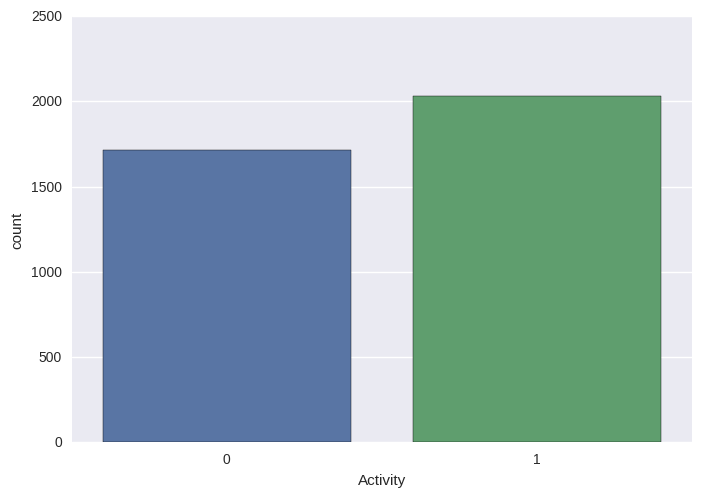

In [6]:
print 'Is the dataset unbalanced ?'

sns.set(style="darkgrid")
sns.countplot(x='Activity', data=data_pd)

In [45]:
print 'ExtraTreesClassifier, to find most important features'

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[:50] # Afficher les 50 premiers seulement ! 

# Diagramme en barre permettant de connaitre l'importance des features
%matplotlib auto
df = pd.DataFrame( importances[indices], index = indices)
df.plot(kind='bar', legend = False, width = .8, figsize = (15,5))
plt.title("Features importance")
plt.show()

ExtraTreesClassifier, to find most important features
Using matplotlib backend: Qt4Agg


Is this dataset clearly separable ? 
Feature treshold :  0.00844594594595
Top 1 of Good Features: [26]


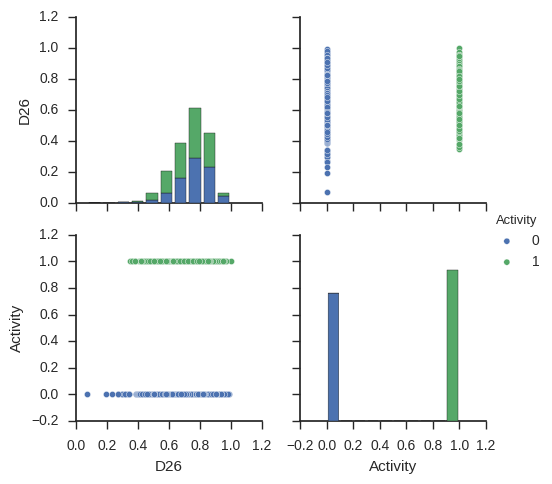

In [95]:
print 'Is this dataset clearly separable ? '

goodFeatures = []

features =importances

featuresThreshold = 15 #This threshold modifies number of good features.

print "Feature treshold : ", np.mean(features)*featuresThreshold

for feature in range(len(features)):
    if(features[feature] > np.mean(features)*featuresThreshold):
        goodFeatures.append(feature)
        
print 'Top '+ str(len(goodFeatures))+ ' of Good Features: ' + str(goodFeatures)

sns.set(style="ticks", color_codes=True)
sns.pairplot(data_pd[data_pd.columns[goodFeatures + [0]]], hue='Activity')


In [49]:
from sklearn.decomposition import PCA,  IncrementalPCA
n_components = [40,50,60,70,80,90,100,150,200,250,300,350]
ratio_train=[]
ratio_valid=[]
ratio_test=[]
for cp in n_components:
    ipca = IncrementalPCA(n_components=cp, batch_size=cp)
    X_ipca = ipca.fit_transform(X_train)
    #print('PCA Results: ')
    #print (ipca.explained_variance_ratio_) 
    ratio_train.append(np.sum(ipca.explained_variance_ratio_))
    X_ipca=ipca.fit_transform(X_valid)
    ratio_valid.append(np.sum(ipca.explained_variance_ratio_))
    X_ipca=ipca.fit_transform(X_test)
    ratio_test.append(np.sum(ipca.explained_variance_ratio_))

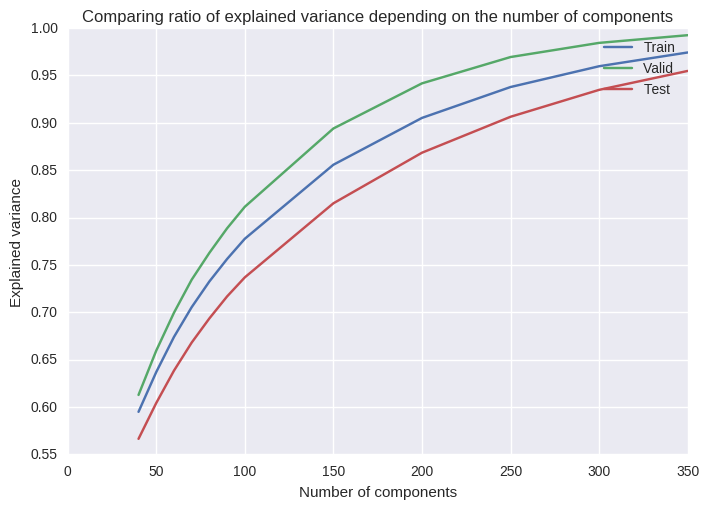

In [52]:
import matplotlib.pyplot as plt
plt.plot(n_components, ratio_train, label='Train')
plt.plot(n_components, ratio_valid,  label='Valid')
plt.plot(n_components, ratio_test, label='Test')
plt.ylabel('Explained variance')
plt.xlabel('Number of components')
plt.title('Comparing ratio of explained variance depending on the number of components')
plt.legend()

## Correlations 

In [57]:
corr=data_pd.corr()

In [73]:
corr['Activity'][corr['Activity']>0.2]

Activity    1.000000
D27         0.472340
D146        0.213311
D182        0.228664
D209        0.210154
D469        0.268601
D596        0.204092
D607        0.210270
D659        0.226049
D660        0.204864
D747        0.226468
Name: Activity, dtype: float64

## Missing values , no missing values

In [15]:
data_pd.isnull().values.ravel().sum()

0

## Detecting outliers